In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Error bars

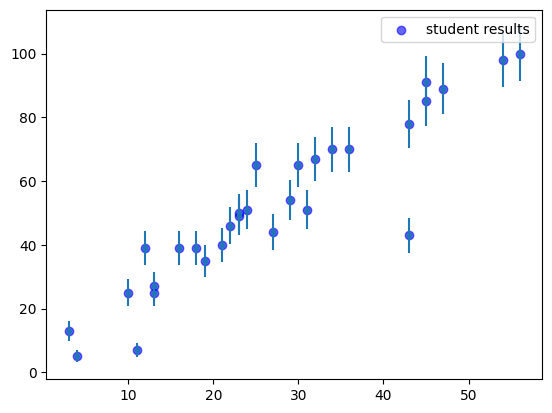

In [2]:
import matplotlib.pyplot as plt

students = {'learning_hours': [10,4,3,16,45,23,43,21,32,12,31,11,18,25,29,13,19,43,24,27,36,45,47,54,22,13,34,23,56,30],
            'exam_results': [25,5,13,39,85,50,78,40,67,39,51,7,39,65,54,25,35,43,51,44,70,91,89,98,46,27,70,49,100,65]}
data = pd.DataFrame(data=students)

x = data.learning_hours
y = data.exam_results
y_err = 0.85*np.sqrt(y) # generates fake error

plt.scatter(x, y, c='blue', alpha=0.6, label='student results')
plt.errorbar(x, y, yerr=y_err, fmt='.')
plt.legend()
plt.show()

# Long Theory

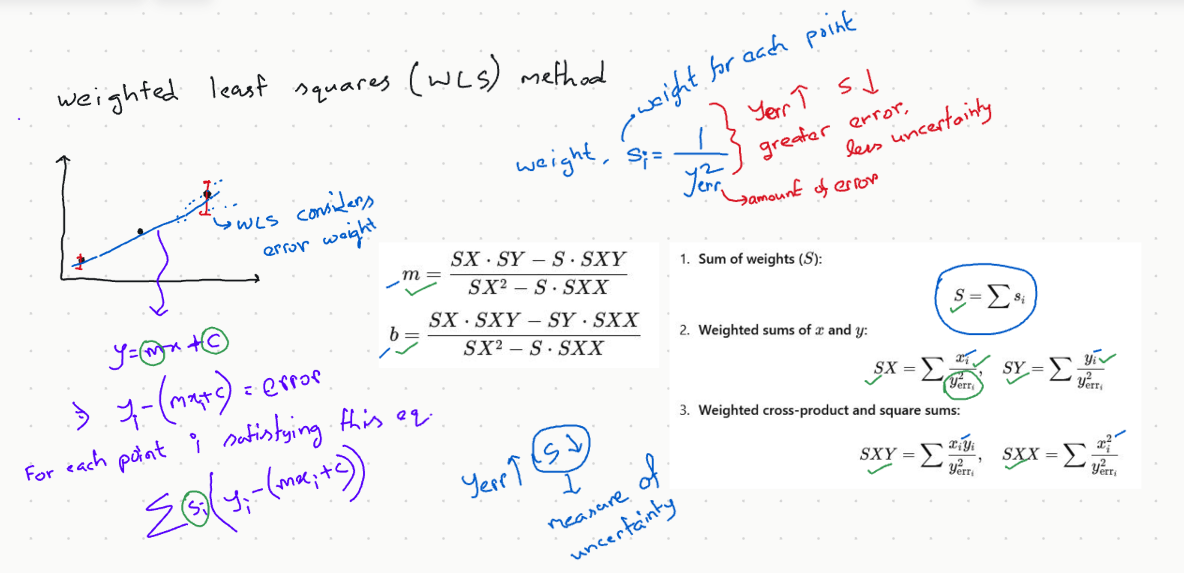

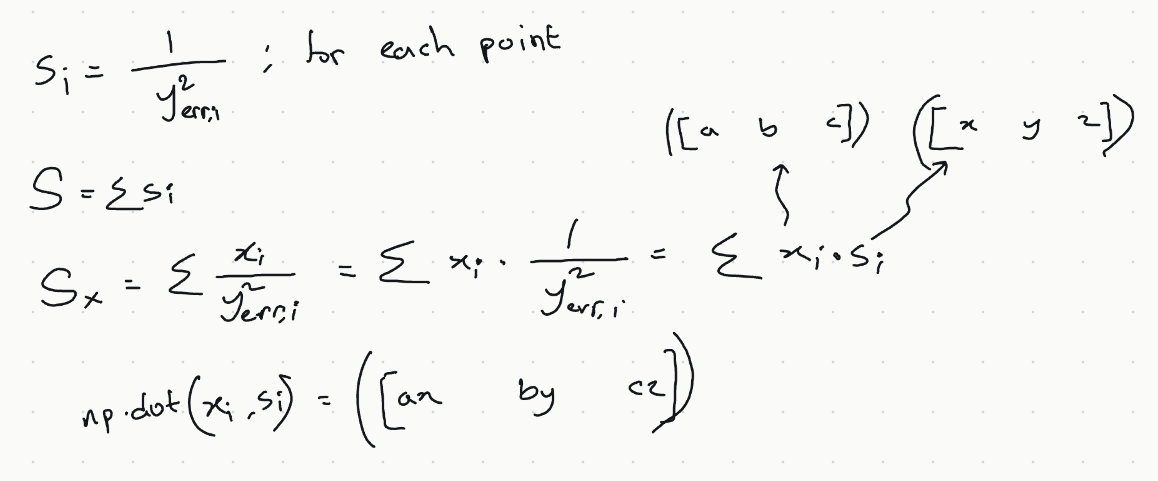

In [3]:
# data given as dictionary 
students = {'learning_hours': [10,4,3,16,45,23,43,21,32,12,31,11,18,25,29,13,19,43,24,27,36,45,47,54,22,13,34,23,56,30],
            'exam_results': [25,5,13,39,85,50,78,40,67,39,51,7,39,65,54,25,35,43,51,44,70,91,89,98,46,27,70,49,100,65]}
# create dataframe
data = pd.DataFrame(data=students)


# get data as arrays
xi = np.array(students['learning_hours'])
yi = np.array(students['exam_results'])


# adds an fake error
y_err = 0.9*np.sqrt(yi) # 10% error


# calculate the weights
s = 1.0 / (y_err**2) # weight for each point is the inverse square of error at the point
S = np.sum(s)

SX = np.dot(xi, s)
SY = np.dot(yi, s)

SXY = np.dot(xi * yi, s)
SXX = np.dot(xi**2, s)



# calculate regression line parameters
m = (SX*SY - S*SXY)/(SX*SX - S*SXX)
b = (SX*SXY - SY*SXX)/ (SX*SX-S*SXX)



print(f'WLS Method regression function: y = {m}x + {b}')

WLS Method regression function: y = 1.8066142576400859x + 0.333335369528242


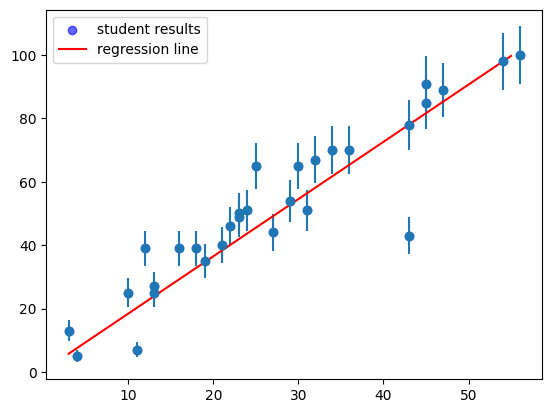

In [13]:
# plot

def linreg_with_error(x):
    return m*x+b

x_linreg = range(min(xi), max(xi))
y_linreg = linreg_with_error(x_linreg)


plt.scatter(xi, yi, c='blue', alpha=0.6, label='student results')
plt.errorbar(xi, yi, yerr=y_err, fmt='o')
plt.plot(x_linreg, y_linreg, 'r', label='regression line')
plt.legend()
plt.show()